<a href="https://colab.research.google.com/github/lavanyaH2005/youtube_subscriber_prediction/blob/main/youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
cd ../content/youtube/

/content/youtube


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor

In [8]:
data = pd.read_csv('youtube_data.csv')

//data.head=>first five display
//data.tail=> display last five

In [9]:
data

,Video,Video title,Video publish time,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
0,7E7tl6rm7VM,100% Accuracy Mushroom Classification - Data E...,23-Aug-20,5,8,36,98.0,1,49,19.96,0:03:17,1429,78.3655,11.0,10910,8.67
1,-46XflOZewg,Bike Share Usage Prediction - Data Every Day #230,28-Mar-21,2,4,1,100.0,0,10,17.55,0:03:31,88,5.1650,0.0,1601,3.37
2,1OHk8urt60A,Tic-Tac-Toe Winner Classification - Data Every...,28-Dec-20,2,3,4,100.0,0,10,17.03,0:04:13,108,7.5958,0.0,2251,2.04
3,4lnUUZxeGBI,Health Insurance Interest Prediction - Data Ev...,17-Sep-20,2,3,6,100.0,0,6,16.01,0:04:21,297,21.5845,5.0,2674,6.28
4,9AnCNBL8c6Q,Age Prediction From Facial Images (CNN Regress...,27-Feb-21,2,5,3,100.0,0,14,20.11,0:04:53,266,21.6983,2.0,3014,5.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,xHKEcMkR9d8,Car Loan Default Prediction (Data Preprocessin...,22-Jan-21,0,0,4,100.0,0,5,12.53,0:06:09,146,14.9656,3.0,2146,3.22
245,xgRxO9iqITI,Pneumonia X-Ray Image Recognition - Data Every...,6-Nov-20,0,3,0,100.0,0,2,16.32,0:04:25,58,4.2834,3.0,1693,1.83
246,y70bUYIPe2A,Dealing With Imbalanced Classes (Forest Cover ...,14-Dec-20,0,3,7,100.0,0,13,12.60,0:04:58,251,20.8134,2.0,5775,2.37
247,yeB59AI2Peo,Predicting Student Grades - Data Every Day #016,26-Aug-20,0,2,5,100.0,0,12,14.26,0:03:27,263,15.1233,4.0,3298,5.12


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Video                               249 non-null    object 
 1   Video title                         249 non-null    object 
 2   Video publish time                  249 non-null    object 
 3   End screen element clicks           249 non-null    int64  
 4   Comments added                      249 non-null    int64  
 5   Shares                              249 non-null    int64  
 6   Likes (vs. dislikes) (%)            249 non-null    float64
 7   Dislikes                            249 non-null    int64  
 8   Likes                               249 non-null    int64  
 9   Average percentage viewed (%)       249 non-null    float64
 10  Average view duration               249 non-null    object 
 11  Views                               249 non-n

In [11]:
def preprocess_inputs(df):
    df = df.copy()

    # Drop unused columns
    df = df.drop(['Video', 'Video title'], axis=1)

    # Drop row with missing target value
    missing_target_row = df[df['Subscribers'].isna()].index
    df = df.drop(missing_target_row, axis=0).reset_index(drop=True)
    # Extract date features
    df['Video publish time'] = pd.to_datetime(df['Video publish time'])
    df['Video month'] = df['Video publish time'].apply(lambda x: x.month)
    df['Video day'] = df['Video publish time'].apply(lambda x: x.day)
    df = df.drop('Video publish time', axis=1)

    # Convert durations to seconds
    df['Average view duration'] = pd.to_datetime(df['Average view duration']).apply(lambda x: (x.minute * 60) + x.second)

    # Split df into X and y
    y = df['Subscribers']
    X = df.drop('Subscribers', axis=1)

    return X, y

training data x,y for splitting process

In [18]:
X

,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Impressions,Impressions click-through rate (%),Video month,Video day
0,5,8,36,98.0,1,49,19.96,197,1429,78.3655,10910,8.67,8,23
1,2,4,1,100.0,0,10,17.55,211,88,5.1650,1601,3.37,3,28
2,2,3,4,100.0,0,10,17.03,253,108,7.5958,2251,2.04,12,28
3,2,3,6,100.0,0,6,16.01,261,297,21.5845,2674,6.28,9,17
4,2,5,3,100.0,0,14,20.11,293,266,21.6983,3014,5.14,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,4,100.0,0,5,12.53,369,146,14.9656,2146,3.22,1,22
244,0,3,0,100.0,0,2,16.32,265,58,4.2834,1693,1.83,11,6
245,0,3,7,100.0,0,13,12.60,298,251,20.8134,5775,2.37,12,14
246,0,2,5,100.0,0,12,14.26,207,263,15.1233,3298,5.12,8,26


In [19]:
y

0      11.0
1       0.0
2       0.0
3       5.0
4       2.0
       ... 
243     3.0
244     3.0
245     2.0
246     4.0
247     3.0
Name: Subscribers, Length: 248, dtype: float64

kfold => iterations

iloc =>location

In [20]:
rmses = []
r2s = []

kf = KFold(n_splits=5)

for train_idx, test_idx in kf.split(X):
    X_train = X.iloc[train_idx, :]
    X_test = X.iloc[test_idx, :]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    rmses.append(rmse)

    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    r2s.append(r2)

In [22]:
print("     RMSE: {:.2f}".format(np.mean(rmses)))
print("R^2 Score: {:.5f}".format(np.mean(r2s)))

     RMSE: 1.99
R^2 Score: 0.46881


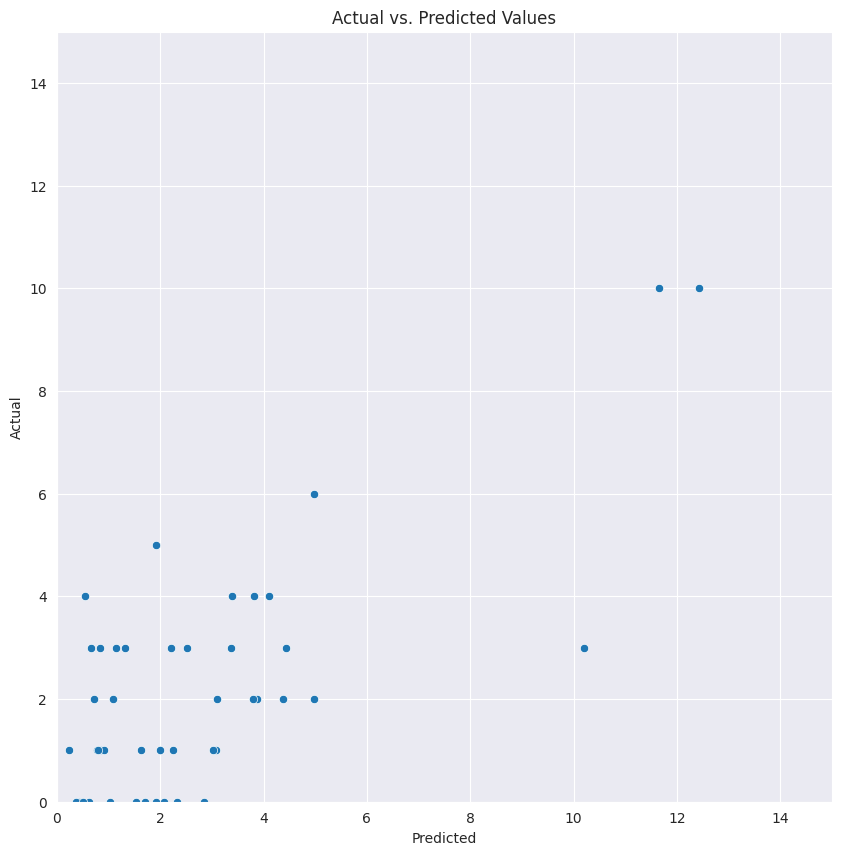

In [21]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.title("Actual vs. Predicted Values")
plt.show()